# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Для анализа имеются данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Задачи проекта:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


Стадии процесса очистки руды:

1. Флотация

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

2. Очистка

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Подготовка данных

In [1]:
import pandas as pd #импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
try: # чтение файла с сайта
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except: # чтение файла локально
    df_train = pd.read_csv('C:\\Users\dedal\OneDrive\Рабочий стол\Яндекс.Практикум\Часть 9. Сборный проект 2\datasets\gold_recovery_train_new.csv')
    df_test = pd.read_csv('C:\\Users\dedal\OneDrive\Рабочий стол\Яндекс.Практикум\Часть 9. Сборный проект 2\datasets\gold_recovery_test_new.csv')
    df_full = pd.read_csv('C:\\Users\dedal\OneDrive\Рабочий стол\Яндекс.Практикум\Часть 9. Сборный проект 2\datasets\gold_recovery_full_new.csv')

Обзор данных:

In [3]:
display(df_train.head())
display(df_test.head())
display(df_full.head())
print('--------------------------------------')
print('Размер:')
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)
print('--------------------------------------')
print('Информация:')
print(df_train.info())
print(df_test.info())
print(df_full.info())
print('--------------------------------------')
print('Дубликаты:')
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())
print('--------------------------------------')
print('Пропуски:')
print(df_train.isna().sum())
print(df_test.isna().sum())
print(df_full.isna().sum())
print('--------------------------------------')
print('Описание данных:')
display(df_train.describe())
display(df_test.describe())
display(df_full.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


--------------------------------------
Размер:
(14149, 87)
(5290, 53)
(19439, 87)
--------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb    

0
0
--------------------------------------
Пропуски:
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatba

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


В данных есть пропуски.

Дубликатов нет.

Признаки имеют разный масштаб.

### Проверка расчёта эффективности обогащения

**Расчёт эффективности**

Нужно смоделировать процесс восстановления золота из золотосодержащей руды.
Эффективность обогащения рассчитывается по формуле:

$$
\text{Recovery} = \frac{ С \times (F-T)}{F \times(C-T)}\times 100\%
$$

где:
- $C$ — доля золота в концентрате после флотации/очистки;
- $F$ — доля золота в сырье/концентрате до флотации/очистки;
- $T$ — доля золота в отвальных хвостах после флотации/очистки.


Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

Проверим, что эффективность обогащения рассчитана правильно. 

Вычислим её на обучающей выборке для признака rougher.output.recovery. 

Признак "rougher.output.recovery" относится к этапу "rougher" - флотация.

Тип параметра "output" - параметры продукта.

Название параметра "recovery" - эффективность.

Чтобы вручную рассчитать эффективность, нам понадобятся другие пареметры этапа "rougher":
- доля золота в концентрате после флотации/очистки - содержится в столбце 'rougher.output.concentrate_au'
- доля золота в сырье/концентрате до флотации/очистки - содержится в столбце 'rougher.input.feed_au'
- доля золота в отвальных хвостах после флотации/очистки - содержится в столбце 'rougher.output.tail_au'

Напишем функцию для расчёта эффективности:

In [4]:
def recov (row): # при применении функции важен будет порядок столбцов
    c_after = row.iloc[0] # первый столбец - доля золота после этапа 
    c_before = row.iloc[1] # второй столбец - доля золота до этапа 
    c_tail = row.iloc[2] # третий столбец - доля золота в хвостах
    recovery_check = (c_after*(c_before-c_tail))/(c_before*(c_after-c_tail))
    return recovery_check*100

Работа функции:

In [5]:
recovery_check = df_train[['rougher.output.concentrate_au', 
    'rougher.input.feed_au', 
    'rougher.output.tail_au']].apply(recov, axis=1)

Сравним графики:

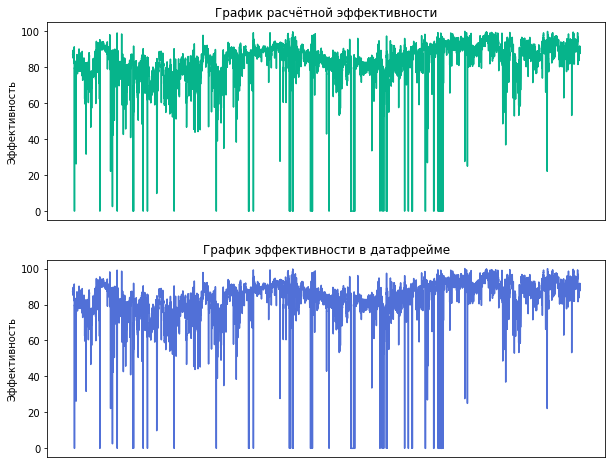

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
ax1.set_label("Эффективность")
ax1.set_ylabel("Эффективность")
ax1.plot(recovery_check, color = 'xkcd:green blue')
ax1.set_title('График расчётной эффективности')
ax1.set_xticks([])
ax2.plot(df_train['rougher.output.recovery'], color = 'xkcd:cornflower blue')
ax2.set_title('График эффективности в датафрейме')
ax2.set_ylabel("Эффективность")
ax2.set_xticks([])
plt.show()

Выглядит достаточно похоже. Для уточнения найдём MAE между нашими расчётами и значением признака. 

In [7]:
mean_absolute_error(df_train['rougher.output.recovery'], recovery_check)

9.73512347450521e-15

**Вывод:** Cредняя абсолютная ошибка очень маленькая, около 10 в -15-й степени. Можно считать значение эффективности в датафрейме верным, а данные - корректными.

### Анализ признаков, недоступных в тестовой выборке

Посмотрим, какие признаки есть в полной выборке, но отсутствуют с тестовой.

In [8]:
df_full.shape # размер датафрейма

(19439, 87)

In [9]:
df_test.shape # размер датафрейма

(5290, 53)

В тестовой выборке отсутствуют 87 - 53 = 34 столбца. 

Найдём столбцы, которые есть в полной выборке, но отсутствуют в тестовой.

In [10]:
df_full.columns[~pd.Series(df_full.columns).isin(pd.Series(df_test.columns))]

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Эти столбцы содержат информацию о концентрации элементов - золота, серебра и других - в отвальных хвостах и очищенной смеси после этапов:
- первичной очистки (primary_cleaner), 
- вторичной очистки (secondary_cleaner), 
- флотации (rougher), 
- финальные выходные концентрации (final),

а также некоторые расчётные параметры флотации. 

**Вывод:** Эти столбцы добавились после формирования тестового датафрейма и после окончания очистки. Эти данные были бы недоступны до окончания процесса, поэтому на них модель обучать нельзя.



### Предобработка данных

#### Преобразование форматов

Преобразуем столбец 'date' в формат даты и времени.

In [11]:
df_train['date'].head(3) #смотрим формат

0    2016-01-15 00:00:00
1    2016-01-15 01:00:00
2    2016-01-15 02:00:00
Name: date, dtype: object

In [12]:
df_train['date']= pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_train['date'].head(3) # проверка 

0   2016-01-15 00:00:00
1   2016-01-15 01:00:00
2   2016-01-15 02:00:00
Name: date, dtype: datetime64[ns]

Преобразование прошло верно. Проведём с другими двумя датафреймами.

In [13]:
df_test['date']= pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date']= pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

#### Изменение индекса

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Установим столбец "date" в качестве индекса.

In [14]:
df_train = df_train.set_index('date')
df_train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Повторим для других датафреймов:


In [15]:
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')
display(df_test.head(3))
display(df_full.head(3))

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


#### Добавление недостающих данных в тестовую выборку

Необходимо добавить в тестовую выборку недостающие столбцы с целевыми признаками из полной выборки. Позже мы отделим их как целевые признаки.

In [16]:
print("Размер датафрейма до операции:", df_test.shape) # размер до 
lack = ['rougher.output.recovery', 'final.output.recovery'] # отсутствующие столбцы
for col in range(len(lack)):
    df_test[lack[col]] = df_full[lack[col]]
print('-------------------------------------------------')
print("Размер датафрейма после операции:", df_test.shape) # размер после
display(df_test.head(5))


Размер датафрейма до операции: (5290, 52)
-------------------------------------------------
Размер датафрейма после операции: (5290, 54)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


#### Удаление столбцов из обучающей выборки.


Чтобы проверить работу модели по тестовой выборке, нужно привести обучающую выборку в соответствие с тестовой.

Части данных в тестовой выборке нет. Удалим их и из обучающей.

In [17]:
columns_drop = df_train.columns[~pd.Series(df_train.columns).isin(pd.Series(df_test.columns))] # удаляемые столбцы
df_train = df_train.drop(columns_drop , axis=1)
print("Обучающая выборка:", df_train.shape)
print("Обучающая выборка:", df_test.shape)

Обучающая выборка: (14149, 54)
Обучающая выборка: (5290, 54)


Количество столбцов совпадает, операция прошла успешно.

#### Заполнение пропусков

Просмотрим, сколько и каких пропусков есть в столбцах:

In [18]:
for col in range(len(df_train.columns)):
    print('Столбец:', df_train.columns[col])
    print("Количество пропусков:", len(df_train[df_train.iloc[:, col].isna()]))
    print('Строки с пропусками:')
    display(df_train[df_train.iloc[:, col].isna()].head(5))
    print('------------------------------------------------')

Столбец: final.output.recovery
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: primary_cleaner.input.sulfate
Количество пропусков: 20
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-30 16:00:00,2.080672,NaN,NaN,8.48,0.009179,1500.533165,-500.977978,1499.756644,-498.828214,1500.727791,...,0.000073,-500.292197,0.000068,-506.891392,-0.251167,-501.800291,0.668043,-500.396051,0.230999,-500.013874
2016-03-02 11:00:00,0.463711,NaN,0.012373,7.62,0.001285,1602.198286,-450.681741,1600.252087,-449.323651,1599.761123,...,13.974818,-578.520549,14.065672,-501.248199,12.011447,-500.417855,10.025794,-499.889108,20.033958,-499.999036
2016-06-30 19:59:59,100.000000,NaN,NaN,7.31,NaN,1697.674286,-498.075966,1699.239866,-489.467718,1602.133795,...,17.038284,-501.556625,8.972578,-500.082165,17.001588,-387.026716,7.946884,-157.396071,25.013642,-203.923380
2017-01-06 19:59:59,67.275195,NaN,0.416502,7.79,NaN,1854.162080,-615.091268,2114.906758,-593.303764,1779.139349,...,0.000000,-530.197868,0.000000,-799.619081,-0.112612,-792.794538,0.646208,-515.392892,0.238511,-809.398668


------------------------------------------------
Столбец: primary_cleaner.input.depressant
Количество пропусков: 32
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-30 16:00:00,2.080672,NaN,NaN,8.480,0.009179,1500.533165,-500.977978,1499.756644,-498.828214,1500.727791,...,0.000073,-500.292197,0.000068,-506.891392,-0.251167,-501.800291,0.668043,-500.396051,0.230999,-500.013874
2016-01-31 06:00:00,28.650801,43.320036,NaN,8.100,0.622271,1498.602898,-500.274945,1501.114391,-500.430283,1501.513677,...,14.989145,-499.547060,13.057198,-499.027603,13.996761,-500.355129,13.950817,-500.321720,16.015743,-498.213796
2016-01-31 07:00:00,39.020344,44.998230,NaN,8.100,0.680230,1498.641206,-500.356599,1500.491395,-500.066400,1498.025102,...,15.021193,-503.354246,12.997230,-508.022142,13.998385,-501.803887,14.046225,-499.799878,16.012260,-501.635575
2016-01-31 08:00:00,43.750736,49.131706,NaN,7.395,0.729487,1498.679514,-499.290144,1500.017522,-499.743788,1498.563948,...,14.969862,-504.630601,12.993907,-508.320739,14.039645,-499.463907,13.995551,-500.101543,15.956461,-500.987799


------------------------------------------------
Столбец: primary_cleaner.input.feed_size
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: primary_cleaner.input.xanthate
Количество пропусков: 100
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-24 08:00:00,56.583361,104.956422,11.999398,7.37,NaN,1597.697640,-399.819202,1596.949702,-399.888695,1600.157805,...,11.998092,-500.936562,12.031555,-500.081283,11.969752,-500.306954,10.013980,-499.529430,19.940392,-500.892556
2016-05-01 01:59:59,100.000000,4.494127,0.537326,8.40,NaN,1545.276832,-497.689866,1554.624773,-497.102269,1549.974989,...,14.956706,-500.612510,13.115482,-500.857934,8.998472,-492.875599,9.004232,-498.633139,16.033764,-492.840123
2016-06-30 19:59:59,100.000000,NaN,NaN,7.31,NaN,1697.674286,-498.075966,1699.239866,-489.467718,1602.133795,...,17.038284,-501.556625,8.972578,-500.082165,17.001588,-387.026716,7.946884,-157.396071,25.013642,-203.923380
2016-08-06 17:59:59,45.771200,39.212581,4.021451,6.96,NaN,1601.363273,-499.934881,1604.865110,-498.900916,1598.727276,...,20.005287,-399.101286,9.905119,-400.346541,8.670982,-399.648465,5.065398,-399.260062,22.986697,-496.006129


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_a_air
Количество пропусков: 4
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 21:59:59,57.718183,80.011635,3.994980,5.490000,NaN,NaN,-500.022340,NaN,-500.842943,1700.053280,...,24.981603,-401.338819,23.079486,-400.157573,19.970762,-449.622014,19.985032,-449.913867,24.987741,-499.823949
2017-03-15 19:59:59,100.000000,176.598604,12.024094,6.840001,NaN,NaN,-499.410156,NaN,-499.859600,1791.410462,...,25.034883,-399.810576,22.952997,-399.392831,20.600245,-449.525756,20.012920,-450.095434,25.010148,-499.045821
2017-03-15 20:59:59,100.000000,175.505505,12.068985,6.840000,NaN,NaN,-499.720475,NaN,-500.375933,1803.374222,...,25.016427,-400.109071,22.994589,-400.400253,20.893171,-450.174260,20.011053,-449.821464,24.991897,-499.761926


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_b_air
Количество пропусков: 4
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 21:59:59,57.718183,80.011635,3.994980,5.490000,NaN,NaN,-500.022340,NaN,-500.842943,1700.053280,...,24.981603,-401.338819,23.079486,-400.157573,19.970762,-449.622014,19.985032,-449.913867,24.987741,-499.823949
2017-03-15 19:59:59,100.000000,176.598604,12.024094,6.840001,NaN,NaN,-499.410156,NaN,-499.859600,1791.410462,...,25.034883,-399.810576,22.952997,-399.392831,20.600245,-449.525756,20.012920,-450.095434,25.010148,-499.045821
2017-03-15 20:59:59,100.000000,175.505505,12.068985,6.840000,NaN,NaN,-499.720475,NaN,-500.375933,1803.374222,...,25.016427,-400.109071,22.994589,-400.400253,20.893171,-450.174260,20.011053,-449.821464,24.991897,-499.761926


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_b_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_c_air
Количество пропусков: 2
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-29 03:59:59,60.811202,117.195454,6.386127,7.03,1.223624,1799.146062,-500.309268,1686.727854,-499.686087,NaN,...,24.991005,-399.596083,23.007646,-401.220697,30.027047,-450.060302,23.991144,-449.746618,25.620867,-500.167425


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_c_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_d_air
Количество пропусков: 3
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-10 12:59:59,67.687438,167.354366,13.076156,7.48,1.166675,1500.193806,-500.148805,1500.948148,-499.144904,1497.942599,...,15.281775,-500.218429,13.254834,-499.307694,10.961954,-500.913820,5.961388,-500.610792,20.015071,-501.615067
2017-03-29 03:59:59,60.811202,117.195454,6.386127,7.03,1.223624,1799.146062,-500.309268,1686.727854,-499.686087,NaN,...,24.991005,-399.596083,23.007646,-401.220697,30.027047,-450.060302,23.991144,-449.746618,25.620867,-500.167425


------------------------------------------------
Столбец: primary_cleaner.state.floatbank8_d_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.input.feed_ag
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.input.feed_pb
Количество пропусков: 100
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-31 10:00:00,40.604484,50.025824,4.951704,6.69,0.858775,1498.756130,-500.446775,1496.784795,-499.759022,1501.061777,...,14.994432,-500.520093,13.022626,-500.094759,14.033300,-498.885385,14.078144,-500.312907,16.033936,-498.991823
2016-02-04 16:00:00,42.357525,132.427800,9.980541,7.31,1.495869,1598.497961,-501.098852,1597.751245,-499.706598,1601.273621,...,17.010192,-501.037503,16.056064,-500.911956,17.992385,-500.905870,16.016135,-500.393541,17.963274,-500.158105
2016-02-27 19:00:00,68.950557,93.495886,6.724729,7.70,0.784433,1599.600255,-450.259179,1601.897888,-449.258953,1600.112362,...,13.989981,-503.474464,13.924121,-500.102173,11.957236,-501.502694,10.037315,-500.943501,20.013567,-501.080054
2016-02-27 20:00:00,62.388421,61.967248,5.180330,7.70,0.625527,1598.870077,-449.561822,1601.250615,-448.788797,1599.386134,...,13.978915,-501.737401,13.985050,-501.621837,11.947470,-500.615752,10.022499,-500.109753,20.012988,-500.975711
2016-03-03 18:00:00,29.387374,85.381617,9.467139,8.49,0.717046,1604.469583,-449.414464,1599.808217,-450.060624,1603.199456,...,14.002513,-504.906874,14.056635,-500.860142,12.021547,-503.113192,10.009947,-499.804394,19.988318,-502.448451


------------------------------------------------
Столбец: rougher.input.feed_rate
Количество пропусков: 8
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-21 00:59:59,78.303791,103.555658,4.798365,6.50,1.093272,1700.595366,-499.189451,1707.047727,-497.636382,1700.733503,...,19.982420,-501.208158,15.094672,-499.829374,10.927321,-500.661661,8.985731,-499.727117,10.975385,-499.666141
2018-02-21 01:59:59,16.423530,NaN,0.135100,6.50,NaN,1699.840436,-500.352737,1702.816848,-500.323006,1700.783724,...,20.037077,-490.175878,15.091411,-497.325709,10.909210,-497.998867,9.029502,-499.656848,11.021525,-498.264084
2018-02-23 14:59:59,76.253850,108.766374,7.847694,7.69,1.349162,1701.479726,-500.125215,1701.505757,-498.210621,1701.968873,...,20.006471,-504.900794,14.967659,-500.647067,10.946728,-501.195107,8.985551,-500.163114,11.015053,-501.988761
2018-03-29 11:59:59,59.781419,132.857240,3.764796,7.51,0.093886,1474.615291,-498.080045,1702.179981,-496.268128,1699.919028,...,23.004693,-502.022495,15.069249,-500.555370,17.966638,-502.578016,12.020091,-500.253798,13.001350,-500.276973


------------------------------------------------
Столбец: rougher.input.feed_size
Количество пропусков: 144
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-10 16:00:00,69.465858,130.006944,13.039988,7.79,0.900475,1798.196837,-400.790068,1798.227552,-400.309639,1802.391623,...,13.971585,-397.460141,13.924028,-400.657217,11.956787,-449.009381,10.018096,-450.029321,20.008586,-448.748296
2016-03-11 15:00:00,68.397527,112.324865,11.961296,7.79,0.995141,1597.129065,-399.239167,1596.878748,-400.373915,1597.556694,...,11.968772,-499.964879,12.002107,-499.550417,11.965672,-499.164445,9.949426,-499.661894,19.981944,-499.699730
2016-03-11 16:00:00,70.636145,121.726763,12.060144,7.79,1.067181,1597.043734,-400.718386,1596.826769,-400.232090,1599.678029,...,12.013643,-498.677855,11.981175,-499.713360,12.167892,-499.804591,10.031085,-500.322855,20.006856,-500.163295
2016-03-17 23:00:00,69.538394,172.774737,12.028035,7.88,0.987373,1601.953421,-398.980331,1596.215727,-399.729360,1600.679230,...,11.986463,-500.188976,12.029072,-500.211950,11.974734,-500.260762,10.030656,-499.940437,20.006512,-500.280675


------------------------------------------------
Столбец: rougher.input.feed_sol
Количество пропусков: 78
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 23:00:00,55.088448,126.397495,12.709727,7.25,1.229626,1601.301169,-498.725777,1605.370031,-500.644437,1598.360694,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
2016-01-19 02:00:00,58.017871,15.273131,1.940663,7.25,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
2016-01-20 17:00:00,49.836467,45.682471,4.025308,7.25,0.399221,1549.121877,-498.662929,1550.086558,-500.499551,1547.956133,...,14.055718,-549.694176,12.005398,-550.660760,10.019514,-501.677694,8.123011,-499.966297,11.995185,-601.176360
2016-01-28 06:00:00,55.235125,40.522905,3.921921,7.73,0.457748,1496.248961,-499.942859,1501.181155,-499.140333,1500.799985,...,14.962364,-552.603157,13.015154,-550.108720,10.050661,-605.892733,7.993430,-600.128409,11.973748,-603.013151
2016-02-04 16:00:00,42.357525,132.427800,9.980541,7.31,1.495869,1598.497961,-501.098852,1597.751245,-499.706598,1601.273621,...,17.010192,-501.037503,16.056064,-500.911956,17.992385,-500.905870,16.016135,-500.393541,17.963274,-500.158105


------------------------------------------------
Столбец: rougher.input.feed_au
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.input.floatbank10_sulfate
Количество пропусков: 29
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-19 02:00:00,58.017871,15.273131,1.940663,7.25,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-18 14:59:59,52.576792,62.830953,7.006670,8.21,0.574743,1601.946035,-500.703455,1607.720913,-500.257229,1603.724847,...,15.012221,-401.688850,4.974202,-400.312056,10.051200,-403.969189,5.039952,-400.190704,23.012079,-501.597792
2017-03-17 07:59:59,49.803205,24.767205,2.364825,7.56,0.527468,1697.727385,-498.917662,1735.961103,-497.238807,1805.749310,...,24.980761,-399.656696,22.969908,-399.919751,21.143900,-446.837072,19.988989,-449.639572,24.976754,-500.298335
2017-07-13 20:59:59,43.234164,40.010587,2.198810,5.31,0.444120,1716.936799,-499.521654,1638.357032,-499.019164,1752.317852,...,21.935676,-500.545499,15.002559,-379.946634,17.995937,-501.723754,13.016940,-499.933589,14.984270,-499.646788


------------------------------------------------
Столбец: rougher.input.floatbank10_xanthate
Количество пропусков: 8
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-11 20:59:59,100.000000,NaN,NaN,6.94,NaN,1298.928087,-798.577111,1303.837276,-500.265282,1296.641028,...,13.002672,-498.172249,10.071658,-399.561435,11.998223,-499.612372,10.015878,-482.374132,15.006390,-501.041922
2017-08-11 21:59:59,100.000000,NaN,NaN,6.94,NaN,1298.915213,-798.512561,1302.574863,-500.012935,1304.657630,...,13.047791,-502.295304,10.066962,-399.828421,11.992198,-499.656008,9.992625,-477.184345,14.984273,-499.821207
2017-08-11 22:59:59,100.000000,NaN,NaN,6.94,0.007293,1299.568181,-797.727504,1298.397342,-500.473486,1297.655488,...,12.989179,-497.962476,10.062266,-399.633222,12.007115,-495.958656,10.009730,-497.646724,15.010481,-499.770750
2017-08-11 23:59:59,100.000000,NaN,NaN,6.94,NaN,1296.968589,-794.839096,1300.356507,-502.132940,1302.200248,...,12.966152,-501.474309,10.057570,-399.991909,11.986572,-499.417926,10.034411,-500.031387,14.994034,-499.921115


------------------------------------------------
Столбец: rougher.input.floatbank11_sulfate
Количество пропусков: 36
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-19 02:00:00,58.017871,15.273131,1.940663,7.25,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-02 11:00:00,0.463711,NaN,0.012373,7.62,0.001285,1602.198286,-450.681741,1600.252087,-449.323651,1599.761123,...,13.974818,-578.520549,14.065672,-501.248199,12.011447,-500.417855,10.025794,-499.889108,20.033958,-499.999036
2016-05-15 14:59:59,45.586191,58.717323,12.027662,6.61,0.922359,1392.770893,-500.326034,1299.437987,-499.958419,1203.788552,...,10.012410,-501.591840,7.907263,-513.814631,8.568602,-498.174475,5.968032,-499.963947,19.985684,-503.306448
2016-07-18 14:59:59,52.576792,62.830953,7.006670,8.21,0.574743,1601.946035,-500.703455,1607.720913,-500.257229,1603.724847,...,15.012221,-401.688850,4.974202,-400.312056,10.051200,-403.969189,5.039952,-400.190704,23.012079,-501.597792


------------------------------------------------
Столбец: rougher.input.floatbank11_xanthate
Количество пропусков: 428
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-19 02:00:00,58.017871,15.273131,1.940663,7.25,0.180119,1546.951271,-501.138590,1550.530280,-500.130616,1551.535239,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-02 11:00:00,0.463711,NaN,0.012373,7.62,0.001285,1602.198286,-450.681741,1600.252087,-449.323651,1599.761123,...,13.974818,-578.520549,14.065672,-501.248199,12.011447,-500.417855,10.025794,-499.889108,20.033958,-499.999036
2016-05-15 13:59:59,79.975380,159.551841,11.972081,7.74,0.904101,1203.830417,-499.751674,1204.874868,-499.591962,1201.389978,...,9.989485,-501.018930,8.028083,-504.302157,8.806407,-499.302177,5.980273,-500.507677,20.006564,-496.164292
2016-05-15 14:59:59,45.586191,58.717323,12.027662,6.61,0.922359,1392.770893,-500.326034,1299.437987,-499.958419,1203.788552,...,10.012410,-501.591840,7.907263,-513.814631,8.568602,-498.174475,5.968032,-499.963947,19.985684,-503.306448


------------------------------------------------
Столбец: rougher.output.recovery
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.state.floatbank10_a_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.state.floatbank10_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.state.floatbank10_b_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.state.floatbank10_b_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.state.floatbank10_c_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.state.floatbank10_c_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: rougher.state.floatbank10_d_air
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.state.floatbank10_d_level
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.state.floatbank10_e_air
Количество пропусков: 436
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2018-01-13 06:59:59,57.557984,171.875602,10.509944,7.82,0.954376,1497.719816,-499.233295,1497.761434,-500.443690,1499.308378,...,20.052922,-585.381488,15.098006,-499.772273,11.055911,-499.907068,9.016732,-499.727837,10.987126,-499.496542
2018-01-13 07:59:59,63.659320,168.171593,10.462669,7.94,0.583674,1499.049757,-503.749386,1499.905454,-500.530468,1498.342418,...,19.953973,-588.450946,15.093321,-499.435354,11.031651,-495.611513,9.006014,-499.733468,10.998483,-500.430261
2018-01-13 08:59:59,68.976483,168.963320,10.806682,7.94,0.480901,1502.059096,-498.772421,1501.620772,-500.206659,1498.578592,...,20.032762,-560.471402,14.951279,-500.026895,11.020021,-496.755029,9.013825,-500.006304,10.990806,-500.473983
2018-01-13 09:59:59,65.439097,179.127784,11.008129,7.94,0.408029,1503.728736,-499.554462,1501.437434,-499.746503,1501.130918,...,20.026457,-604.295908,14.967815,-499.878840,11.086489,-499.558840,8.976374,-500.074995,10.997302,-500.540830
2018-01-13 10:59:59,64.708091,185.013156,10.986960,7.94,0.400875,1502.541042,-501.040275,1498.125024,-499.522917,1498.120909,...,20.001011,-536.313430,15.057715,-496.218953,11.045538,-505.552482,8.984440,-500.141693,10.977680,-499.861119


------------------------------------------------
Столбец: rougher.state.floatbank10_e_level
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.state.floatbank10_f_air
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: rougher.state.floatbank10_f_level
Количество пропусков: 0
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank2_a_air
Количество пропусков: 217
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28 14:59:59,0.000000,47.853292,5.031126,5.49,0.404063,1698.052687,-496.890363,1698.098368,-457.363539,1701.021209,...,24.970388,-399.654209,23.008466,-399.508585,20.682065,-443.596068,18.017448,-386.843550,25.021448,-499.457263
2017-02-28 15:59:59,0.000000,49.106372,5.033794,5.49,0.406644,1702.296193,-502.811267,1699.924664,-542.942298,1698.627340,...,24.988576,-400.944119,23.020085,-400.374134,20.176891,-454.657471,19.257933,-449.820792,24.979159,-501.400800
2017-02-28 16:59:59,75.347463,54.739923,5.040737,5.49,0.411729,1699.235260,-499.310097,1702.752643,-498.530827,1698.750863,...,25.022907,-399.034781,23.050634,-399.605443,19.789140,-448.731388,18.590263,-449.900477,24.982381,-499.150504
2017-02-28 17:59:59,44.313686,70.523744,4.142145,5.49,0.517255,1701.030359,-500.533995,1698.232357,-500.003566,1696.994617,...,25.033958,-399.913364,22.997180,-400.089497,19.983607,-449.491242,18.782633,-449.780075,25.000366,-499.738170


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank2_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank2_b_air
Количество пропусков: 21
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-15 10:00:00,52.118942,68.539637,5.575728,6.675,0.828570,1582.217185,-499.941211,1599.367980,-499.849278,1867.634284,...,17.964202,-446.595646,15.961823,-315.341074,15.944569,-488.232047,11.966396,-498.672382,25.015804,-498.642810
2016-02-15 11:00:00,59.638066,113.242956,10.610152,6.320,1.234400,1600.280540,-500.165927,1601.165795,-500.208888,1599.311180,...,18.008125,-388.595011,16.077463,-295.516586,16.003745,-509.706038,11.963636,-501.044706,25.018000,-500.316956
2016-02-15 12:00:00,67.452140,125.771685,12.324188,6.320,1.355551,1601.359139,-500.050184,1603.077197,-499.894867,1599.050753,...,18.000943,-499.823119,15.970544,-505.646686,16.004155,-501.859423,11.931662,-500.084138,24.972760,-500.181898
2017-02-28 14:59:59,0.000000,47.853292,5.031126,5.490,0.404063,1698.052687,-496.890363,1698.098368,-457.363539,1701.021209,...,24.970388,-399.654209,23.008466,-399.508585,20.682065,-443.596068,18.017448,-386.843550,25.021448,-499.457263


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank2_b_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank3_a_air
Количество пропусков: 4
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-15 10:00:00,52.118942,68.539637,5.575728,6.675,0.828570,1582.217185,-499.941211,1599.367980,-499.849278,1867.634284,...,17.964202,-446.595646,15.961823,-315.341074,15.944569,-488.232047,11.966396,-498.672382,25.015804,-498.642810
2016-02-15 11:00:00,59.638066,113.242956,10.610152,6.320,1.234400,1600.280540,-500.165927,1601.165795,-500.208888,1599.311180,...,18.008125,-388.595011,16.077463,-295.516586,16.003745,-509.706038,11.963636,-501.044706,25.018000,-500.316956
2016-02-15 12:00:00,67.452140,125.771685,12.324188,6.320,1.355551,1601.359139,-500.050184,1603.077197,-499.894867,1599.050753,...,18.000943,-499.823119,15.970544,-505.646686,16.004155,-501.859423,11.931662,-500.084138,24.972760,-500.181898


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank3_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank3_b_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank3_b_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank4_a_air
Количество пропусков: 6
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-25 07:59:59,0.000000,39.994195,1.990812,7.30,0.196403,1397.790517,-499.592020,1397.725974,-500.312853,1401.182246,...,NaN,-799.634040,5.014348,-799.864719,16.017481,-502.033957,9.997870,-500.032109,15.012719,-500.166375
2017-07-25 08:59:59,0.000000,39.981171,1.985554,7.30,0.282019,1397.679117,-499.437370,1398.723451,-499.443886,1401.528311,...,NaN,-799.501062,5.034026,-799.861981,16.015712,-500.333611,9.996034,-499.903756,15.005399,-499.665857
2017-07-25 09:59:59,57.222456,40.011092,2.016144,7.30,0.297146,1394.403307,-500.060205,1396.610127,-500.266542,1396.516839,...,NaN,-799.247399,5.041516,-799.855453,16.035161,-499.911901,9.981207,-499.995530,15.021380,-500.215728
2017-07-25 10:59:59,55.777382,51.174397,2.011001,7.30,0.371769,1403.043928,-499.371264,1404.549209,-502.455716,1409.175011,...,NaN,-798.993735,5.044539,-799.848925,16.001963,-499.895457,9.994775,-500.021888,14.998134,-499.759658


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank4_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank4_b_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank4_b_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank5_a_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank5_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank5_b_air
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank5_b_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank6_a_air
Количество пропусков: 2
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-23 23:59:59,0.000000,34.339088,1.425304,7.30,0.073258,1637.458546,-500.852344,1900.825938,-525.307129,956.232764,...,5.02138,-799.676748,5.10479,-799.528222,15.962232,-500.22525,10.06211,-499.793051,NaN,-499.842959


------------------------------------------------
Столбец: secondary_cleaner.state.floatbank6_a_level
Количество пропусков: 1
Строки с пропусками:


,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-21 10:00:00,74.257359,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


------------------------------------------------


Рассмотрим первый пропуск - в столбце "primary_cleaner.input.sulfate". Какие значения окружают этот пропуск? Можно ли его правдоподобно заполнить?

В исходных данных есть указание, что соседние по времени параметры часто похожи.

Для примера посмотрим день с первым пропущенным значением.

In [19]:
nonedate = df_train.index.date[df_train['primary_cleaner.input.sulfate'].isna()][0] # дата первого пропуска   
df_train['primary_cleaner.input.sulfate'].loc[
    df_train.index.date == nonedate
]

date
2016-01-21 00:00:00    154.779512
2016-01-21 01:00:00    171.210901
2016-01-21 02:00:00    175.444130
2016-01-21 03:00:00    176.102105
2016-01-21 04:00:00    185.924572
2016-01-21 05:00:00    194.198719
2016-01-21 06:00:00    195.812854
2016-01-21 07:00:00    196.365807
2016-01-21 08:00:00    188.311758
2016-01-21 09:00:00    182.179285
2016-01-21 10:00:00           NaN
2016-01-21 11:00:00    226.482598
2016-01-21 12:00:00    230.232526
2016-01-21 13:00:00    229.597799
2016-01-21 14:00:00    203.200234
2016-01-21 15:00:00    211.985569
2016-01-21 16:00:00    237.143374
2016-01-21 17:00:00    233.317490
2016-01-21 18:00:00    224.770210
2016-01-21 19:00:00    222.427034
2016-01-21 20:00:00    207.971102
2016-01-21 21:00:00    205.996364
2016-01-21 22:00:00    203.094464
2016-01-21 23:00:00    196.179093
Name: primary_cleaner.input.sulfate, dtype: float64

Нарисуем график по данным этого столбца за день, в котором присутствует пропуск.

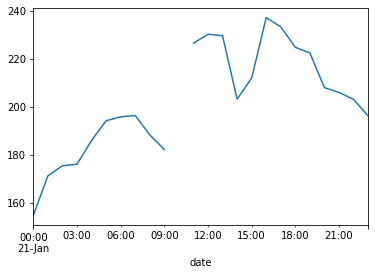

In [20]:
df_train['primary_cleaner.input.sulfate'].loc[
    df_train.index.date == nonedate
].plot();

Попробуем заполнить предыдущим заполненным значением.

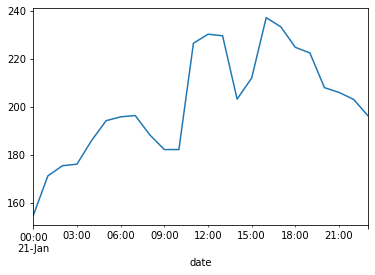

In [21]:
df_train['primary_cleaner.input.sulfate'] = df_train['primary_cleaner.input.sulfate'].fillna(method='ffill')
df_train['primary_cleaner.input.sulfate'].loc[
    df_train.index.date == nonedate
].plot(); #посмотрим график

График заполнен неразрывно, выглядит правдоподобно. Применим тот же метод к всему датафрейму.

In [22]:
df_train = df_train.fillna(method='ffill')
sum_null=0
for col in range(len(df_train.columns)): 
    sum_null += len(df_train[df_train.iloc[:, col].isna()]) # проверка пропусков
print("Строк с пропусками в датафрейме:", sum_null)

Строк с пропусками в датафрейме: 0


Применим метод к другим датафреймам:

In [23]:
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

## Анализ данных

### Анализ изменения концентрации металлов  на различных этапах очистки

Первый этап - флотация. Посмотрим, как меняется концентрация золота, серебра и свинца до и после флотации.

Изменение средней концентрации: 139 %


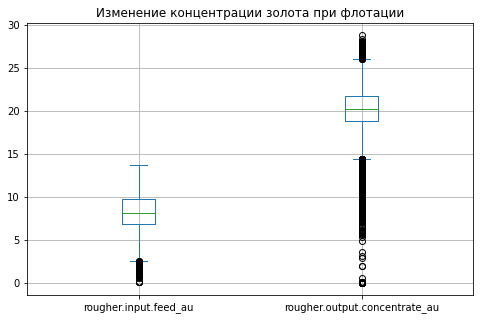

In [24]:
print("Изменение средней концентрации:",
      round((df_full['rougher.output.concentrate_au'].mean()-df_full['rougher.input.feed_au'].mean())/df_full['rougher.input.feed_au'].mean()*100),
     "%")
df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации золота при флотации',
    grid = True
);

Изменение средней концентрации: 36 %


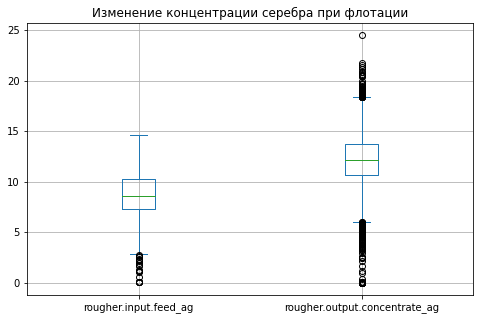

In [25]:
print("Изменение средней концентрации:",
      round((df_full['rougher.output.concentrate_ag'].mean()-df_full['rougher.input.feed_ag'].mean())/df_full['rougher.input.feed_ag'].mean()*100),
     "%")
df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации серебра при флотации',
    grid = True
);

Изменение средней концентрации: 112 %


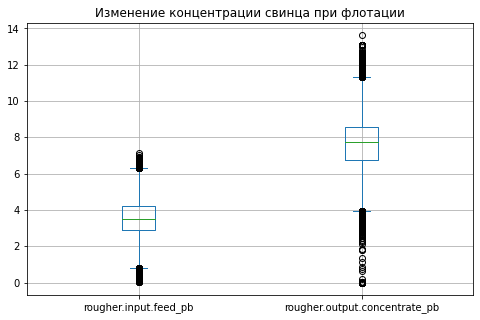

In [26]:
print("Изменение средней концентрации:",
      round((df_full['rougher.output.concentrate_pb'].mean()-df_full['rougher.input.feed_pb'].mean())/df_full['rougher.input.feed_pb'].mean()*100),
     "%")
df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации свинца при флотации',
    grid = True
);

Второй этап - первичная очистка. Посмотрим, как меняется средняя и медианная концентрация золота, серебра и свинца до и после неё.

Изменение средней концентрации: 62 %


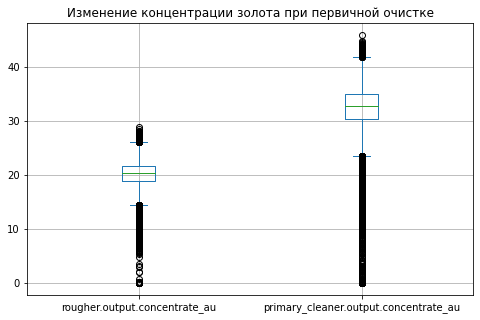

In [27]:
print("Изменение средней концентрации:",
      round((df_full['primary_cleaner.output.concentrate_au'].mean()-df_full['rougher.output.concentrate_au'].mean())/df_full['rougher.output.concentrate_au'].mean()*100),
     "%")
df_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации золота при первичной очистке',
    grid = True
);

Изменение средней концентрации: -30 %


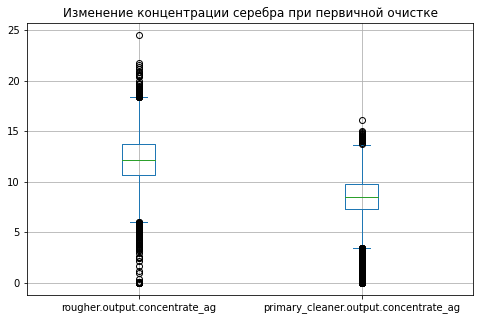

In [28]:
print("Изменение средней концентрации:",
      round((df_full['primary_cleaner.output.concentrate_ag'].mean()-df_full['rougher.output.concentrate_ag'].mean())/df_full['rougher.output.concentrate_ag'].mean()*100),
     "%")
df_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации серебра при первичной очистке',
    grid = True
);

Изменение средней концентрации: 29 %


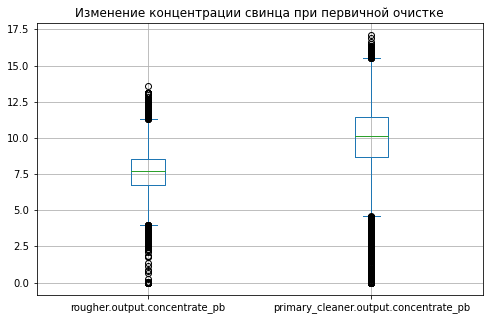

In [29]:
print("Изменение средней концентрации:",
      round((df_full['primary_cleaner.output.concentrate_pb'].mean()-df_full['rougher.output.concentrate_pb'].mean())/df_full['rougher.output.concentrate_pb'].mean()*100),
     "%")
df_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации свинца при первичной очистке',
    grid = True
);

Третий этап - вторичная очистка. Посмотрим, как меняется концентрация золота, серебра и свинца до и после неё.

Изменение средней концентрации: 37 %


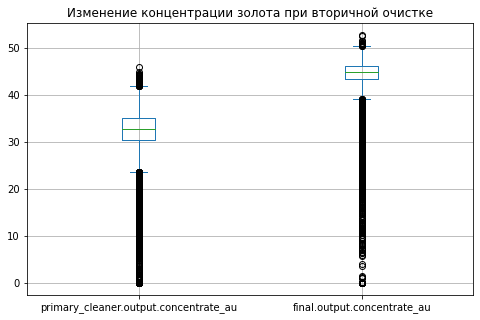

In [30]:
print("Изменение средней концентрации:",
      round((df_full['final.output.concentrate_au'].mean()-df_full['primary_cleaner.output.concentrate_au'].mean())/df_full['primary_cleaner.output.concentrate_au'].mean()*100),
     "%")
df_full[['primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации золота при вторичной очистке',
    grid = True
);

Изменение средней концентрации: -39 %


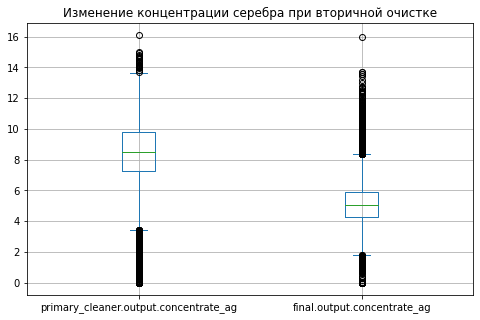

In [31]:
print("Изменение средней концентрации:",
      round((df_full['final.output.concentrate_ag'].mean()-df_full['primary_cleaner.output.concentrate_ag'].mean())/df_full['primary_cleaner.output.concentrate_ag'].mean()*100),
     "%")
df_full[['primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации серебра при вторичной очистке',
    grid = True
);

Изменение средней концентрации: 2 %


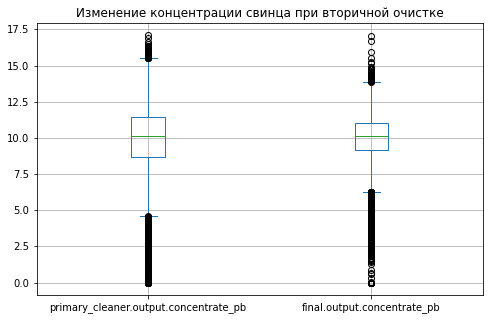

In [32]:
print("Изменение средней концентрации:",
      round((df_full['final.output.concentrate_pb'].mean()-df_full['primary_cleaner.output.concentrate_pb'].mean())/df_full['primary_cleaner.output.concentrate_pb'].mean()*100),
     "%")
df_full[['primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']].plot(
    kind = 'box',
    figsize = (8, 5),
    title = 'Изменение концентрации свинца при вторичной очистке',
    grid = True
);

Рассмотрим изменение концентрации на всех этапах:


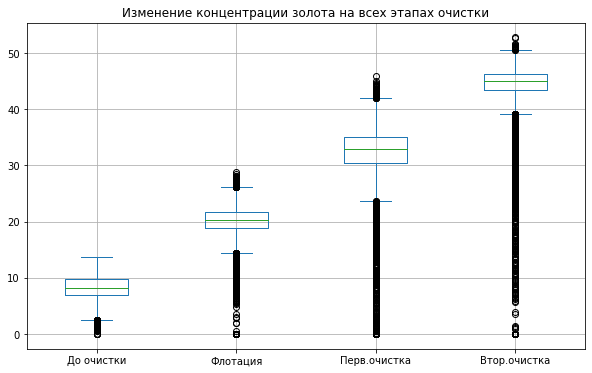

In [33]:
data = df_full[['rougher.input.feed_au',
         'rougher.output.concentrate_au',
         'primary_cleaner.output.concentrate_au',
         'final.output.concentrate_au'
]]
data.columns = ['До очистки', 'Флотация', 'Перв.очистка', 'Втор.очистка']
data.plot(
    kind = 'box',
    figsize = (10, 6),
    title = 'Изменение концентрации золота на всех этапах очистки',
    grid = True
);

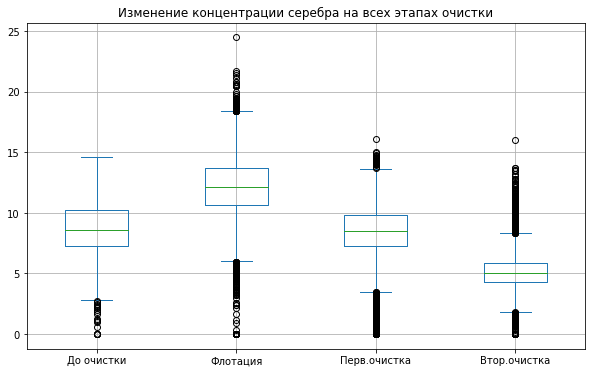

In [34]:
data = df_full[['rougher.input.feed_ag',
         'rougher.output.concentrate_ag',
         'primary_cleaner.output.concentrate_ag',
         'final.output.concentrate_ag'
]]
data.columns = ['До очистки', 'Флотация', 'Перв.очистка', 'Втор.очистка']
data.plot(
    kind = 'box',
    figsize = (10, 6),
    title = 'Изменение концентрации серебра на всех этапах очистки',
    grid = True
);

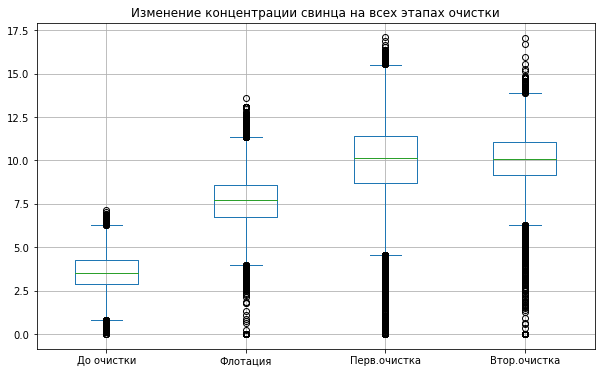

In [35]:
data = df_full[['rougher.input.feed_pb',
         'rougher.output.concentrate_pb',
         'primary_cleaner.output.concentrate_pb',
         'final.output.concentrate_pb'
]]
data.columns = ['До очистки', 'Флотация', 'Перв.очистка', 'Втор.очистка']
data.plot(
    kind = 'box',
    figsize = (10, 6),
    title = 'Изменение концентрации свинца на всех этапах очистки',
    grid = True
);

**Вывод:** 
- Концентрация золота последовательно и значительно увеличивается на каждом этапе очистки.
- Концентрация серебра возрастает на этапе флотации, затем снижается.
- Концентрация свинца возрастает на этапах флотации и первичной очистки, после вторичной очистки не изменяется.

***Очевидно, что очистка направлена на увеличение концентрации золота***

### Сравнение распределения размеров гранул на обучающей и тестовой выборках

Сравним столбцы "rougher.input.feed_size" - размер гранул перед флотацией - в обучающей и тестовой выборках.

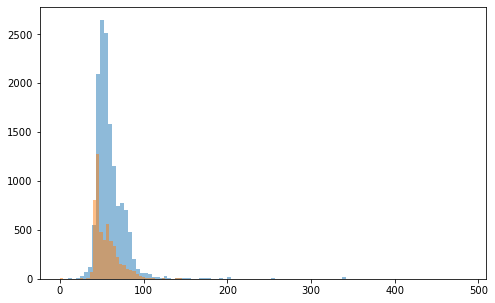

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(df_train['rougher.input.feed_size'], bins = 100, alpha = 0.5, label='Обучающая выборка')
plt.hist(df_test['rougher.input.feed_size'], bins = 100, alpha = 0.5, label='Тестовая выборка')
plt.show()

Распределения похожи. Ограничим значения до 200.

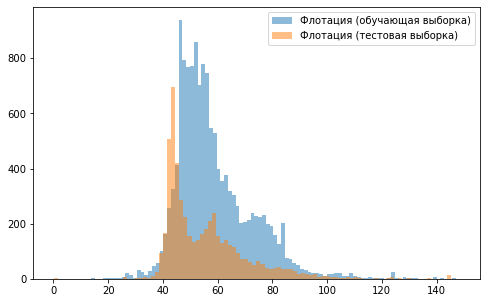

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(df_train.loc[df_train['rougher.input.feed_size']<150]['rougher.input.feed_size'],
         bins = 100, alpha = 0.5, label = "Флотация (обучающая выборка)")
plt.hist(df_test.loc[df_test['rougher.input.feed_size']<150]['rougher.input.feed_size'],
         bins = 100, alpha = 0.5, label = "Флотация (тестовая выборка)")
plt.legend()
plt.show()

Распределения достаточно близки, хотя в тестовой выборке есть некоторое смещение пиков в сторону уменьшения размера гранул.

Сравним столбцы "primary_cleaner.input.feed_size" - размер гранул перед первичной очисткой - в обучающей и тестовой выборках.

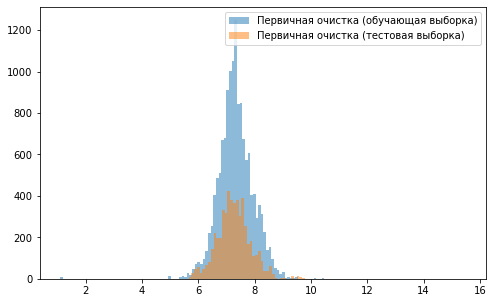

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(df_train['primary_cleaner.input.feed_size'],
         bins = 100, alpha = 0.5, label = "Первичная очистка (обучающая выборка)")
plt.hist(df_test['primary_cleaner.input.feed_size'],
         bins = 100, alpha = 0.5, label = "Первичная очистка (тестовая выборка)")
plt.legend()
plt.show()

Распределение размеров гранул после флотации очень близко. 

**Вывод:** распределения не слишком сильно отличаются друг от друга, оценка модели будет правильной.

### Исследование суммарной концентрации.

Исследуем суммарную среднюю концентрацию всех веществ на разных стадиях.

Вещества, для которых в данных указаны концентрации:
- Золото
- Серебро
- Свинец
- Растворитель

Этапы, на которых можно проследить концентрацию:
- Сырьё
- Черновой концентрат после флотации
- Концентрат после первичной очистки
- Финальный концентрат.

Нарисуем график суммарной концентрации:

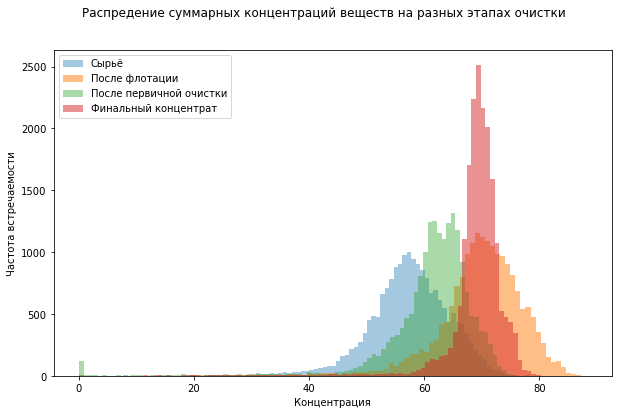

In [59]:
df_full['rougher.input.sum_concentration'] = (df_full['rougher.input.feed_au'] +
                                        df_full['rougher.input.feed_ag']+
                                        df_full['rougher.input.feed_pb']+ 
                                        df_full['rougher.input.feed_sol'])   # сумма в сырье
df_full['rougher.output.sum_concentration'] = (df_full['rougher.output.concentrate_au']+
                                        df_full['rougher.output.concentrate_ag']+ 
                                        df_full['rougher.output.concentrate_pb']+ 
                                        df_full['rougher.output.concentrate_sol'])    # сумма в первой очистке
df_full['primary_cleaner.output.sum_concentration'] = (df_full['primary_cleaner.output.concentrate_au']+ 
                                        df_full['primary_cleaner.output.concentrate_ag']+
                                        df_full['primary_cleaner.output.concentrate_pb']+
                                        df_full['primary_cleaner.output.concentrate_sol'])     # сумма в второй очистке
df_full['final.output.sum_concentration'] = (df_full['final.output.concentrate_au']+ 
                                        df_full['final.output.concentrate_ag']+ 
                                        df_full['final.output.concentrate_pb']+ 
                                        df_full['final.output.concentrate_sol'])    # сумма итог


plt.figure(figsize=(10, 6))
plt.hist(df_full['rougher.input.sum_concentration'],
         bins = 100, alpha = 0.4, label = "Сырьё")
plt.hist(df_full['rougher.output.sum_concentration'],
         bins = 100, alpha = 0.5, label = "После флотации")
plt.hist(df_full['primary_cleaner.output.sum_concentration'],
         bins = 100, alpha = 0.4, label = "После первичной очистки")
plt.hist(df_full['final.output.sum_concentration'],
         bins = 100, alpha = 0.5, label = "Финальный концентрат")
plt.legend()
plt.ylabel('Частота встречаемости')
plt.xlabel("Концентрация")
plt.suptitle('Распредение суммарных концентраций веществ на разных этапах очистки')
plt.show()

Есть выброс значений в районе 0. Удалим из всех датафреймов строки, в которых нулевые суммарные концентрации. В этих строках нет смысла.

In [40]:
print('Данных до операции:', len(df_train))
df_train = df_train.drop(df_train[df_full['rougher.input.sum_concentration']==0].index|
                         df_train[df_full['rougher.output.sum_concentration']==0].index|
                         df_train[df_full['primary_cleaner.output.sum_concentration']==0].index|
                         df_train[df_full['final.output.sum_concentration']==0].index)
df_train[(df_full['final.output.sum_concentration']==0) | 
         (df_full['rougher.output.sum_concentration']==0) |
         (df_full['primary_cleaner.output.sum_concentration']==0) |
         (df_full['final.output.sum_concentration']==0)
        ] # проверка
print('Данных после операции:', len(df_train))

Данных до операции: 14149
Данных после операции: 13725


In [41]:
print('Данных до операции:', len(df_test))
df_test = df_test.drop(df_test[df_full['rougher.input.sum_concentration']==0].index|
                         df_test[df_full['rougher.output.sum_concentration']==0].index|
                         df_test[df_full['primary_cleaner.output.sum_concentration']==0].index|
                         df_test[df_full['final.output.sum_concentration']==0].index)
df_test[(df_full['final.output.sum_concentration']==0) | 
         (df_full['rougher.output.sum_concentration']==0) |
         (df_full['primary_cleaner.output.sum_concentration']==0) |
         (df_full['final.output.sum_concentration']==0)
        ]
print('Данных после операции:', len(df_test))

Данных до операции: 5290
Данных после операции: 5123


In [42]:
print('Данных до операции:', len(df_full))
df_full = df_full.drop(df_full[df_full['rougher.input.sum_concentration']==0].index|
                         df_full[df_full['rougher.output.sum_concentration']==0].index|
                         df_full[df_full['primary_cleaner.output.sum_concentration']==0].index|
                         df_full[df_full['final.output.sum_concentration']==0].index)
print('Данных после операции:', len(df_full))

Данных до операции: 19439
Данных после операции: 18848


Строки с нулевыми суммарными концентрациями успешно удалены.

Построим график с изменением соотношения средних концентраций элементов:

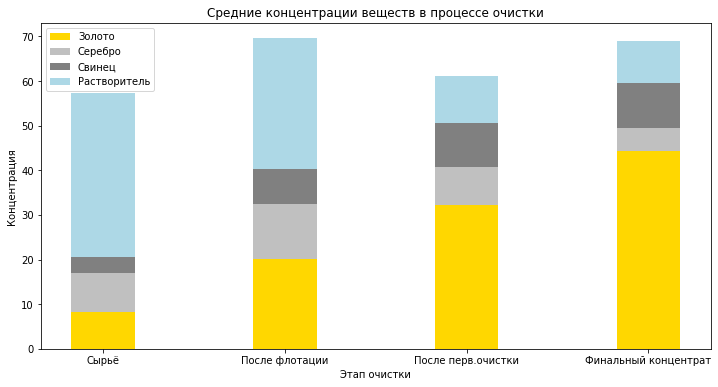

In [60]:
labels = ['Сырьё', 'После флотации', 'После перв.очистки', 'Финальный концентрат']

aurum = np.array([df_full['rougher.input.feed_au'].mean(), df_full['rougher.output.concentrate_au'].mean(),
    df_full['primary_cleaner.output.concentrate_au'].mean(), df_full['final.output.concentrate_au'].mean()])
# золото
argentum = np.array([df_full['rougher.input.feed_ag'].mean(), df_full['rougher.output.concentrate_ag'].mean(),
    df_full['primary_cleaner.output.concentrate_ag'].mean(), df_full['final.output.concentrate_ag'].mean()])
# серебро
plumbum = np.array([df_full['rougher.input.feed_pb'].mean(), df_full['rougher.output.concentrate_pb'].mean(),
    df_full['primary_cleaner.output.concentrate_pb'].mean(), df_full['final.output.concentrate_pb'].mean()])
# свинец
solvent = np.array([df_full['rougher.input.feed_sol'].mean(), df_full['rougher.output.concentrate_sol'].mean(),
    df_full['primary_cleaner.output.concentrate_sol'].mean(), df_full['final.output.concentrate_sol'].mean()])
# растворитель
width = 0.35 # ширина столбца
fig, ax = plt.subplots(figsize = (12, 6)) # размер окна
ax.bar(labels, aurum,  width, label='Золото', color = "gold") # золото
ax.bar(labels, argentum, width, bottom=aurum, label='Серебро', color = 'silver') # серебро
ax.bar(labels, plumbum, width, bottom=aurum+argentum, label='Свинец', color = 'grey') # свинец
ax.bar(labels, solvent, width, bottom=aurum+argentum+plumbum, label='Растворитель', color = 'lightblue') # растворитель
ax.set_ylabel('Концентрация')
ax.set_xlabel("Этап очистки")
ax.set_title('Средние концентрации веществ в процессе очистки')
ax.legend()

plt.show()

## Вывод аналитической части:
- В выборках присутствовали недостоверные строки - с нулевой суммарной концентрацией всех веществ. В процессе анализа они были удалены.
- В процессе очистки суммарная концентрация металлов увеличивается относительно растворителя и прочих веществ.
- Больше всего увеличивается концентрация золота.



## Модели машинного обучения

### Подготовка данных для модели

Целевые признаки:

- rougher.output.recovery

- final.output.recovery

Функция для извлечения признаков:


In [44]:
def target_n_features (df):
    target_r = df['rougher.output.recovery'] # целевой признак 1
    target_f = df['final.output.recovery'] # целевой признак 2
    features = df.drop(['rougher.output.recovery', 'final.output.recovery'] , axis=1) # признаки
    print(target_r.shape, target_f.shape, features.shape) # контроль размеров
    return(target_r, target_f, features)

Извлечём признаки из обучающей выборки:

In [45]:
target_train_r, target_train_f, features_train = target_n_features(df_train)
target_test_r, target_test_f, features_test = target_n_features(df_test)
target_full_r, target_full_f, features_full = target_n_features(df_full)  # полная

(13725,) (13725,) (13725, 52)
(5123,) (5123,) (5123, 52)
(18848,) (18848,) (18848, 88)


Приведём признаки к единому масштабу.
Используем метод стандартизации данных. 

In [46]:
scaler = StandardScaler() 
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Функция для вычисления итоговой sMAPE.

Вычислим метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»). 

Формула для вычисления sMAPE:

$$
\text{sMAPE} = \frac{1}{N}\sum_{i=1}^{Т} \frac{|y_i-\hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2} \times 100 \%
$$
где:

$y_i$ - значение целевого признака,

$\hat{y}_i$ - предсказанное значение признака.

In [47]:
def smape(model, features, target):
    predicted = model.predict(features)
    return 100/len(target) * np.sum(2 * np.abs(target - predicted) / (np.abs(target) + np.abs(predicted)))

Найдём итоговое sMAPE по формуле:

$$
\text{Итоговое sMAPE}=25 \% \times \text{sMAPE(roughter)} + 75 \% \times \text{sMAPE(final)}
$$

Функция для итогового значения:

In [48]:
def fin_smape(smape_r, smape_f):
    return smape_r*0.25 + smape_f*0.75

### Сравнение моделей

#### Линейная регрессия

Обучим модель и проверим её качество:

In [49]:
model = LinearRegression()
smape_r = cross_val_score(model, features_train, target_train_r, cv=5, 
                        scoring=smape) # оценка по одному целевому признаку
smape_f = cross_val_score(model, features_train, target_train_f, cv=5, 
                        scoring=smape) # оценка по второму целевому признаку
fin_smape_LinRegr = fin_smape(smape_r, smape_f).mean()
print('sMAPE:', fin_smape_LinRegr) # итоговая оценка

sMAPE: 10.029323387636358


#### Модель дерево решений

Напишем цикл для нахождения оптимальной глубины дерева решений:

In [50]:
best_fin_smape_tree = 100
fin_smape_list = []   # список для графика
for depth in range(1, 21):   # проверим гиперпараметр - глубину дерева от 1 до 20
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth) # дерево решений
    smape_r = cross_val_score(model, features_train, target_train_r, cv=5, 
                        scoring=smape)   # оценка по одному целевому признаку
    smape_f = cross_val_score(model, features_train, target_train_f, cv=5, 
                        scoring=smape)   # оценка по второму целевому признаку
    fin_smape_list.append(fin_smape(smape_r, smape_f).mean())   # добавляем в список для графика
    if fin_smape(smape_r, smape_f).mean() < best_fin_smape_tree:
        best_depth = depth
        best_fin_smape_tree = fin_smape(smape_r, smape_f).mean()   #сохраним значение
print("Наилучшая глубина:", best_depth)
print("Наилучшая sMAPE:", best_fin_smape_tree)

Наилучшая глубина: 3
Наилучшая sMAPE: 8.912407601041753


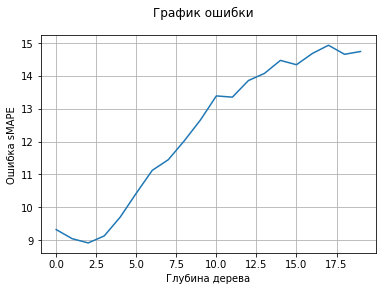

In [51]:
plt.suptitle("График ошибки")
plt.ylabel("Ошибка sMAPE")
plt.xlabel('Глубина дерева')
plt.grid(True)
plt.plot(fin_smape_list); # чем выше график, тем хуже предсказание

После 3 шагов модель переобучается, качество предсказания падает.

#### Модель cлучайный лес

Напишем цикл для нахождения оптимального числа деревьев:

In [52]:
best_fin_smape_forest = 100
for est in range(10, 100, 10): # рассмотрим количество деревьев от 1 до 90
    for depth in range(1, 7): # и глубину дерева от 1 до 6
        model = RandomForestRegressor(random_state=12345, # обучим модель 
                                       n_estimators=est, # с заданным количеством деревьев
                                       max_depth = depth # и глубиной
                                      ) 
        smape_r = cross_val_score(model, features_train, target_train_r, cv=5, 
                        scoring=smape) # оценка по одному целевому признаку
        smape_f = cross_val_score(model, features_train, target_train_f, cv=5, 
                        scoring=smape) # оценка по второму целевому признаку
        
        if fin_smape(smape_r, smape_f).mean() < best_fin_smape_forest:
            best_depth = depth
            best_est = est
            best_fin_smape_forest = fin_smape(smape_r, smape_f).mean() #сохраним значение
print("Оптимальное число деревьев:", best_est)
print("Оптимальная глубина:", best_depth)
print("Наилучшая sMAPE:", best_fin_smape_forest)

Оптимальное число деревьев: 80
Оптимальная глубина: 4
Наилучшая sMAPE: 8.431173397131474


#### Константная модель

Проверим адекватность наших моделей. Сравним их с константной моделью, которая всегда предсказывает медианное значение целевого принзака.

In [53]:
dummy_regr = DummyRegressor(strategy="median")
smape_r = cross_val_score(dummy_regr, features_train, target_train_r, cv=5, 
                        scoring=smape) # оценка по одному целевому признаку
smape_f = cross_val_score(dummy_regr, features_train, target_train_f, cv=5, 
                        scoring=smape) # оценка по второму целевому признаку
fin_smape_DummyRegr = fin_smape(smape_r, smape_f).mean()
print('sMAPE:', fin_smape_DummyRegr)

sMAPE: 9.776462028499582


#### Сравнение результатов моделей

Построим диаграмму сравнения значения sMAPE для разных моделей.

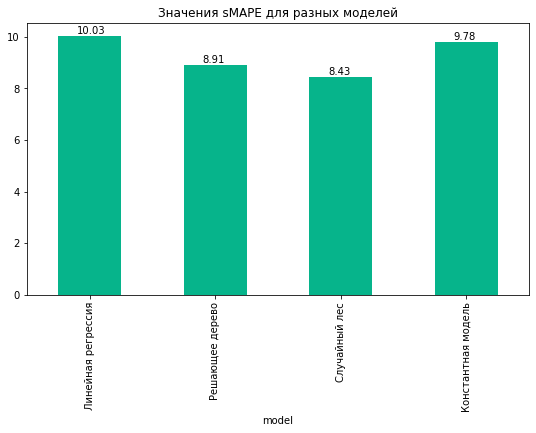

In [54]:
results = {
    'model': ['Линейная регрессия', 'Решающее дерево', 'Случайный лес', 'Константная модель'], 
    'sMAPE': [fin_smape_LinRegr, best_fin_smape_tree, best_fin_smape_forest, fin_smape_DummyRegr]
}
models_compare = pd.DataFrame(data=results).set_index('model')  
models_compare['sMAPE'] = np.round(models_compare['sMAPE'], decimals=2) # округление
ax = models_compare.plot.bar(figsize = (9, 5), color = 'xkcd:green blue', 
                             legend = False, title = 'Значения sMAPE для разных моделей');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()*0.3, p.get_height() * 1.009))  # подписи над столбцами

**Результаты:**
- Модели Случайный лес и Решающее дерево проходят проверку на адекватность, имея лучшее sMAPE, чем константная модель.
- Наилучшее значение sMAPE получено на модели "Случайный лес".

Гиперпараметры лучшей модели:

- Оптимальное число деревьев: 80
- Оптимальная глубина: 4

Наилучшая sMAPE при обучении: 8.43

### Тестирование наилучшей модели

In [55]:
model = RandomForestRegressor(random_state=12345,    # обучим модель 
    n_estimators=80,    # с заданным количеством деревьев
    max_depth = 4    # и глубиной
)
model.fit(features_train, target_train_r)   #  обучим модель на предсказание первого параметра
smape_r = smape(model, features_test, target_test_r)   # smape первого параметра
model.fit(features_train, target_train_f)   # обучим модель на предсказание второго параметра
smape_f = smape(model, features_test, target_test_f)   # smape второго параметра
print('sMAPE на тестовой выборке:', fin_smape(smape_r, smape_f))

sMAPE на тестовой выборке: 7.374055579489486


## Вывод части машинного обучения
- Наилучшая найденная модель - Случайный лес.
- Значение sMAPE на тестовой выборке составляет 7,374.
- Модель может с достаточно высокой точностью предсказывать эффективность очистки руды до начала очистки, что позволит снизить расходы на неоптимальную руду.
- Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками